<a href="https://colab.research.google.com/github/Naukman/Test/blob/main/Kopie_von_%C3%9Cbung_Regressionsmodell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
# Laden des Datensatzes mit pandas
import pandas as pd
data = pd.read_csv('Concrete_Data_Yeh.csv')  # Ersetze 'Dateiname.csv' durch den tatsächlichen Namen
print(data.head())
#Daten anzeigen lassen in Korrelationsmatrix
# Überprüfen der ersten Zeilen des Datensatzes
print("Erste Zeilen des Datensatzes:")
print(data.head())



   cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30  
Erste Zeilen des Datensatzes:
   cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  13


Korrelationsmatrix:
                    cement      slag    flyash     water  superplasticizer  \
cement            1.000000 -0.275216 -0.397467 -0.081587          0.092386   
slag             -0.275216  1.000000 -0.323580  0.107252          0.043270   
flyash           -0.397467 -0.323580  1.000000 -0.256984          0.377503   
water            -0.081587  0.107252 -0.256984  1.000000         -0.657533   
superplasticizer  0.092386  0.043270  0.377503 -0.657533          1.000000   
coarseaggregate  -0.109349 -0.283999 -0.009961 -0.182294         -0.265999   
fineaggregate    -0.222718 -0.281603  0.079108 -0.450661          0.222691   
age               0.081946 -0.044246 -0.154371  0.277618         -0.192700   
csMPa             0.497832  0.134829 -0.105755 -0.289633          0.366079   

                  coarseaggregate  fineaggregate       age     csMPa  
cement                  -0.109349      -0.222718  0.081946  0.497832  
slag                    -0.283999      -0.281603 -0.0442

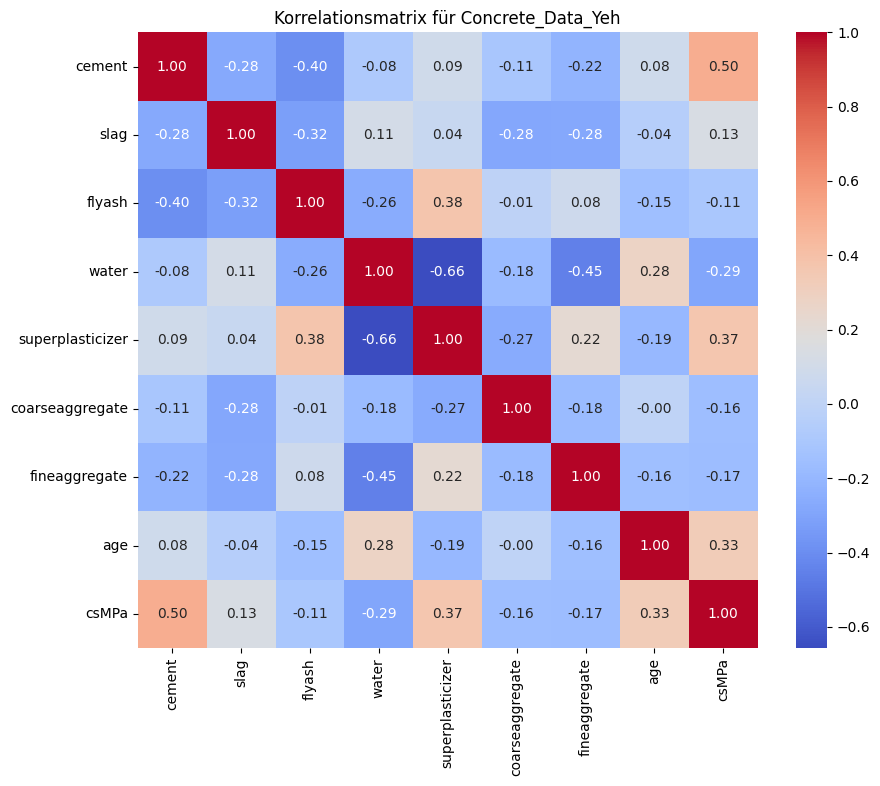

In [ ]:
# Berechnen der Korrelationsmatrix
correlation_matrix = data.corr()

# Anzeigen der Korrelationsmatrix als Tabelle
print("\nKorrelationsmatrix:")
print(correlation_matrix)

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix für Concrete_Data_Yeh')
plt.show()

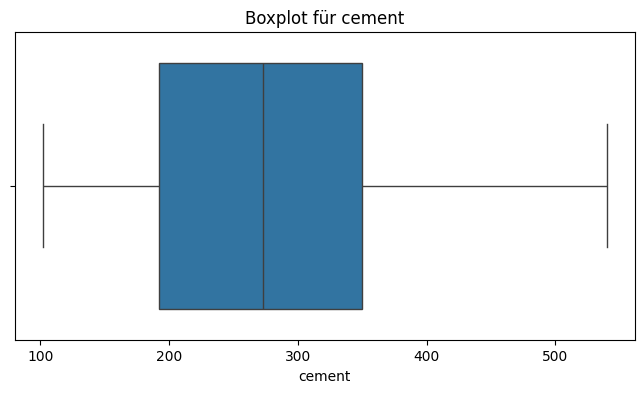

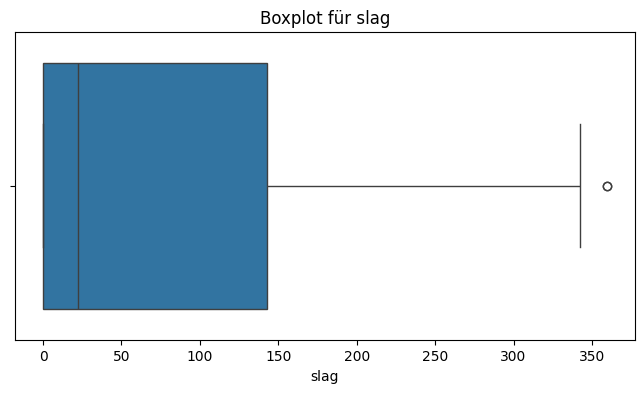

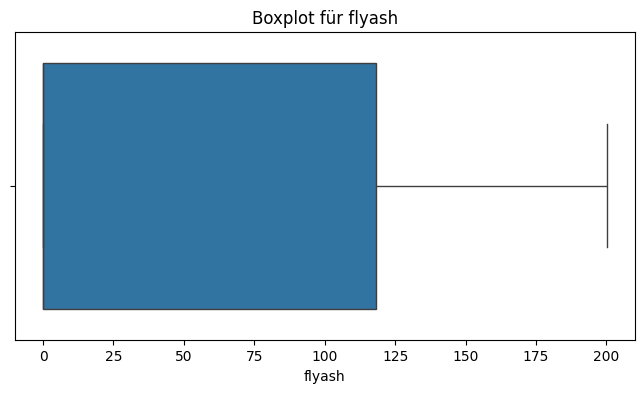

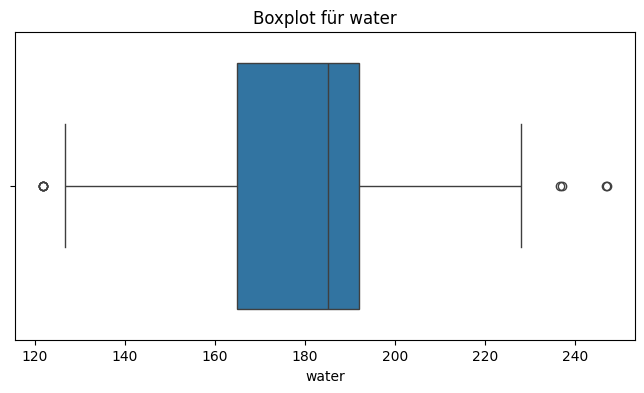

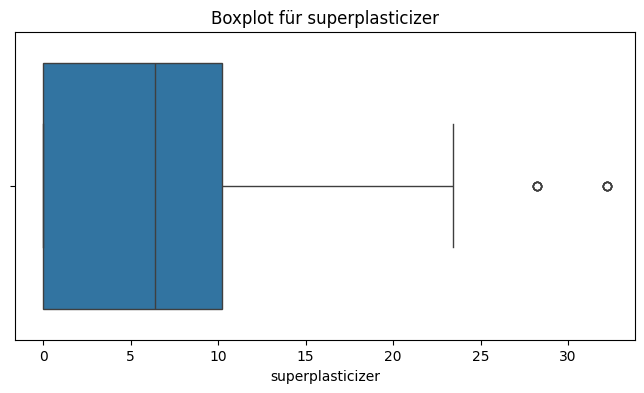

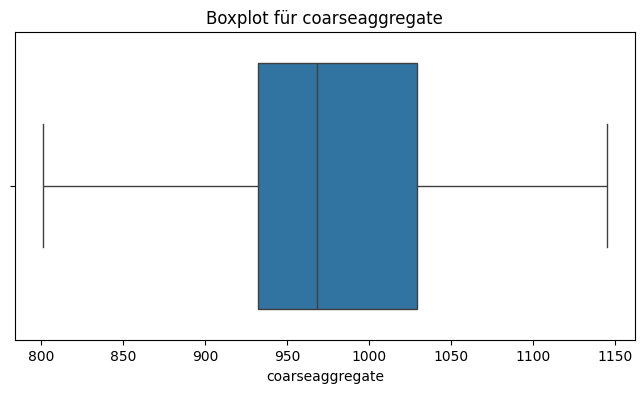

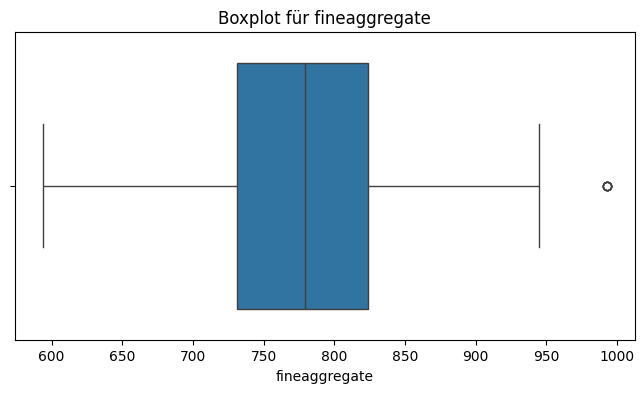

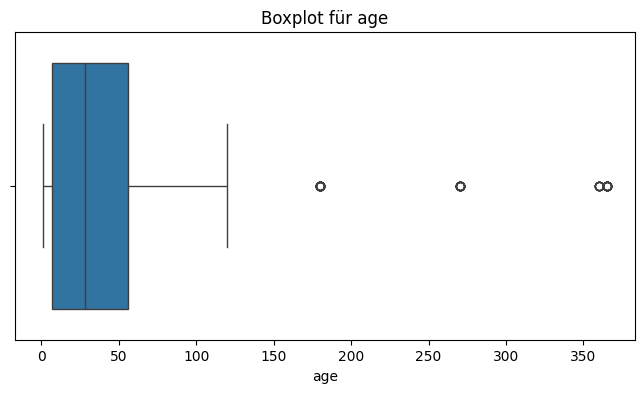

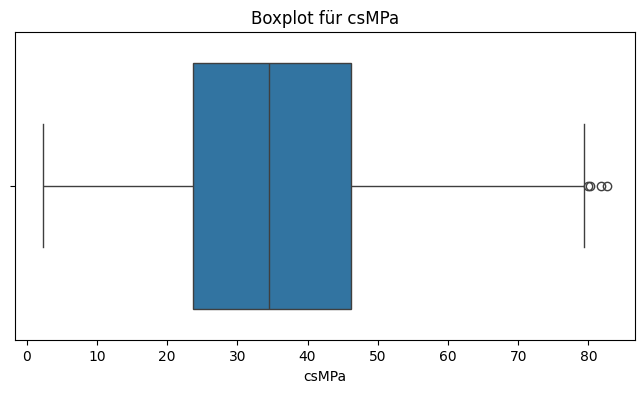

Anzahl der Ausreißer pro Spalte:
cement               0
slag                 2
flyash               0
water                9
superplasticizer    10
coarseaggregate      0
fineaggregate        5
age                 59
csMPa                4
dtype: int64

Zeilen mit Ausreißern:
      cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0      540.0    0.0     0.0  162.0               2.5           1040.0   
2      332.5  142.5     0.0  228.0               0.0            932.0   
3      332.5  142.5     0.0  228.0               0.0            932.0   
4      198.6  132.4     0.0  192.0               0.0            978.4   
6      380.0   95.0     0.0  228.0               0.0            932.0   
...      ...    ...     ...    ...               ...              ...   
823    322.0    0.0     0.0  203.0               0.0            974.0   
862    140.0  164.0   128.0  237.0               6.0            869.0   
873    237.0   92.0    71.0  247.0               6.0            85

In [ ]:
##Untersuchung auf Ausreißer
# Für jede numerische Spalte einen Boxplot erstellen
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot für {column}')
    plt.show()
    # IQR-Methode zur Identifizierung von Ausreißern
Q1 = data.quantile(0.25)  # Erstes Quartil
Q3 = data.quantile(0.75)  # Drittes Quartil
IQR = Q3 - Q1             # Interquartilsabstand

# Grenzen für die Erkennung von Ausreißern
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Überprüfung, welche Werte außerhalb der Grenzen liegen
outliers = ((data < lower_bound) | (data > upper_bound))

# Anzahl der Ausreißer pro Spalte anzeigen
print("Anzahl der Ausreißer pro Spalte:")
print(outliers.sum())

# Optional: Zeilen mit Ausreißern anzeigen
print("\nZeilen mit Ausreißern:")
print(data[outliers.any(axis=1)])

In [ ]:
##Bereinigen/eliminieren der Ausreißer
# Berechnung der IQR-Grenzen
Q1 = data.quantile(0.25)  # Erstes Quartil
Q3 = data.quantile(0.75)  # Drittes Quartil
IQR = Q3 - Q1             # Interquartilsabstand

# Grenzen für die Erkennung von Ausreißern
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Entfernen der Ausreißer
data_cleaned = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Ausgabe der Anzahl der entfernten Zeilen
print(f"Anzahl der Zeilen vor dem Entfernen von Ausreißern: {data.shape[0]}")
print(f"Anzahl der Zeilen nach dem Entfernen von Ausreißern: {data_cleaned.shape[0]}")
print(f"Anzahl der entfernten Zeilen: {data.shape[0] - data_cleaned.shape[0]}")

# Optional: den bereinigten Datensatz anzeigen
print("\nBereinigter Datensatz:")
print(data_cleaned.head())

Anzahl der Zeilen vor dem Entfernen von Ausreißern: 1030
Anzahl der Zeilen nach dem Entfernen von Ausreißern: 941
Anzahl der entfernten Zeilen: 89

Bereinigter Datensatz:
   cement   slag  flyash  water  superplasticizer  coarseaggregate  \
1   540.0    0.0     0.0  162.0               2.5           1055.0   
5   266.0  114.0     0.0  228.0               0.0            932.0   
7   380.0   95.0     0.0  228.0               0.0            932.0   
8   266.0  114.0     0.0  228.0               0.0            932.0   
9   475.0    0.0     0.0  228.0               0.0            932.0   

   fineaggregate  age  csMPa  
1          676.0   28  61.89  
5          670.0   90  47.03  
7          594.0   28  36.45  
8          670.0   28  45.85  
9          594.0   28  39.29  


Spalten im Datensatz:
Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

Vergleich der Modelle:
                         MSE       MAE        R²
Linear Regression  67.165905  6.399828  0.741651
Ridge Regression   67.165958  6.399830  0.741651
Lasso Regression   67.253591  6.404956  0.741313
Decision Tree      77.666066  6.450200  0.701263


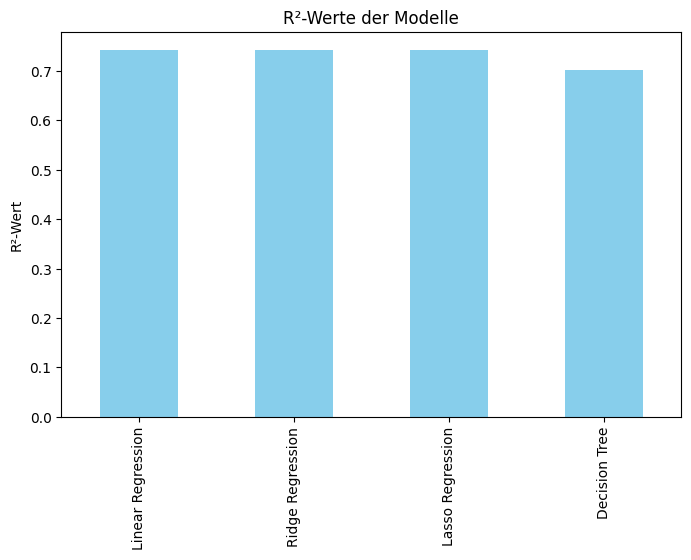

In [ ]:
##Erstellung+Vergleich Regressionsmodelle für bereinigte Daten
# Zeige die Spaltennamen des Datensatzes an, um die Zielspalte zu identifizieren
print("Spalten im Datensatz:")
print(data_cleaned.columns)

# Zielspalte 'csMPa' für die Vorhersage verwenden
X = data_cleaned.drop(columns=['csMPa'])  # Features
y = data_cleaned['csMPa']  # Zielvariable
# Aufteilen in Trainings- und Testdaten
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisiere die Modelle
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5)
}

# Speichere Ergebnisse
results = {}

# Trainiere und evaluiere die Modelle
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MSE": mse,
        "MAE": mae,
        "R²": r2
    }

# Ergebnisse anzeigen
results_df = pd.DataFrame(results).T
print("\nVergleich der Modelle:")
print(results_df)

# Optional: Visualisierung der R²-Werte
import matplotlib.pyplot as plt
results_df['R²'].plot(kind='bar', title='R²-Werte der Modelle', color='skyblue', figsize=(8, 5))
plt.ylabel('R²-Wert')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_cleaned_data.csv'

In [ ]:
##SPeichern der besten Modells für spätere Nutzung